<a href="https://colab.research.google.com/github/sibot89/Deep-Learning/blob/main/Denoising_Auto_Encoder_for_MNIST_Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

In [15]:
(X_train, _), (X_test,_) = mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [18]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0,
                                                            size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0,
                                                            size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

In [19]:
input_img = Input(shape=(784,))

encoder = Dense(units=32, activation='relu')(input_img)
decoder = Dense(units=784, activation='sigmoid')(encoder)

In [20]:
auto_encoder = Model(input_img, decoder)
auto_encoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(X_train_noisy, X_train,
                 epochs=30,
                 batch_size=256)

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3736
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2107
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1784
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1630
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1530
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1453
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1402
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1368
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1341
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1322
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1312
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1304
Epoch 13/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1294
Epoch 14/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1288
Epoch 15/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [22]:
encoder_model = Model(input_img, encoder)
encoder_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        25,120 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
pred = auto_encoder.predict(X_test_noisy)
encoded_images = encoder_model.predict(X_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


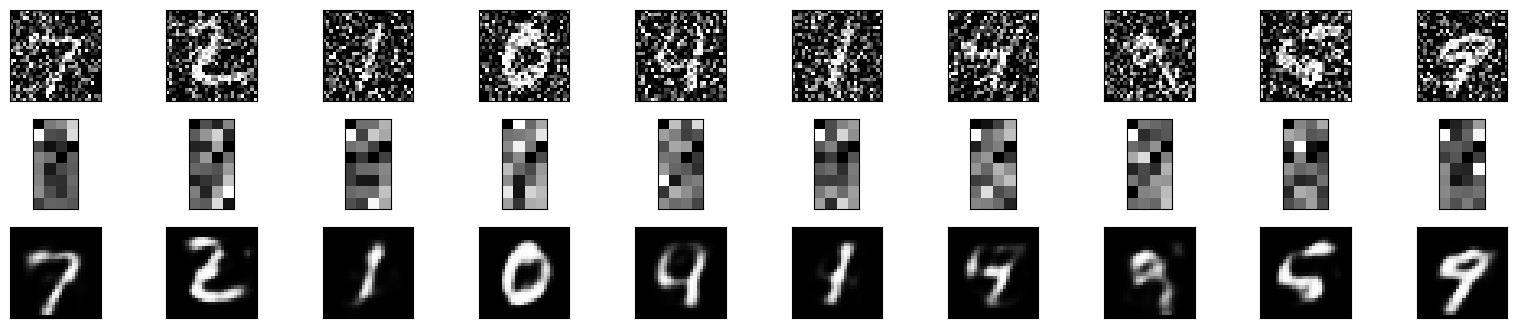

In [25]:
plt.figure(figsize=(40, 4))
for i in range(10):
  ax = plt.subplot(3, 20, i + 1)
  plt.imshow(X_test_noisy[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, 20, i + 1 + 20)
  plt.imshow(encoded_images[i].reshape(8, 4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(3, 20, i + 1 + 20 * 2)
  plt.imshow(pred[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()